# Chipotle **


### Step 1. Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
# remember to %matplotlib inline


### Step 2. Import the dataset of `chipotle` and assign it to a variable called chipo.

In [4]:
address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(address, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 4. Create a histogram of the top 5 items bought

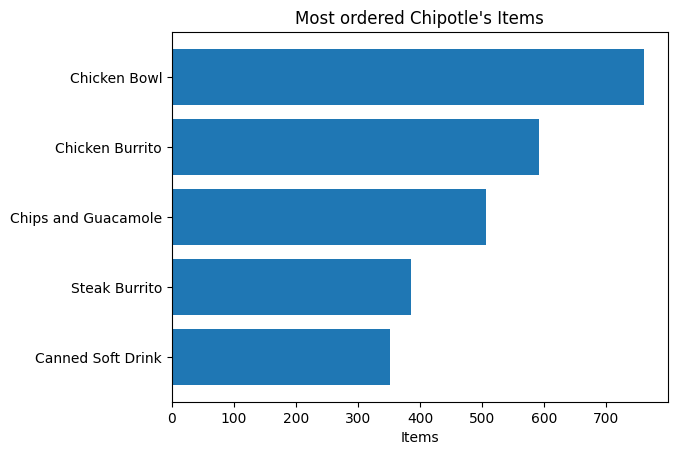

In [45]:
chipo_top5 = chipo.copy()
chipo_top5.drop(columns=['choice_description', 'item_price', 'order_id'], inplace=True)
chipo_top5 = chipo_top5.groupby('item_name').sum().sort_values('quantity', ascending=False).head(5)

# se crea un plot vacío 
plt.rcdefaults()
fig, ax = plt.subplots()

# se completan los datos del plot
items = chipo_top5.index.to_list()
y_pos = np.arange(len(items))
quantity = chipo_top5.quantity.to_list()

ax.barh(y_pos, quantity, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(items)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Items')
ax.set_title("Most ordered Chipotle's Items")

plt.show()

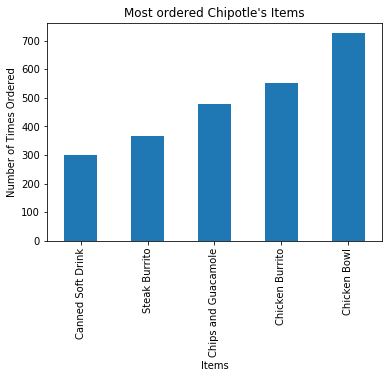

### Step 5. Create a scatterplot with the number of items orderered per order price

Make sure you get the same labels and title
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

<AxesSubplot:title={'center':'Number of ordered items vs order price per order'}, xlabel='Order Price', ylabel='Items Ordered'>

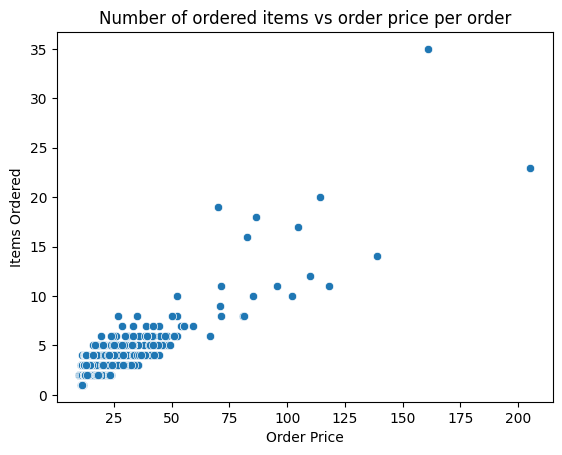

In [62]:
# Se procesan los datos para obtener la información deseada
chipo_price = chipo.copy()
chipo_price['price'] = chipo_price.item_price.apply(lambda x: float(x.replace('$', '')))
chipo_price.drop(columns=['choice_description', 'item_name', 'item_price'], inplace=True)
chipo_price_byorder = chipo_price.groupby('order_id').sum()

# se visualiza la información deseada
# se genera el plot con las condiciones de visualización correctas
fig, ax = plt.subplots()
ax.set_xlabel('Order Price')
ax.set_ylabel('Items Ordered')
ax.set_title('Number of ordered items vs order price per order')

# se genera el contenido del plot 
sns.scatterplot(data=chipo_price_byorder, x='price', y='quantity', ax=ax)


(0, 36.7178857951459)

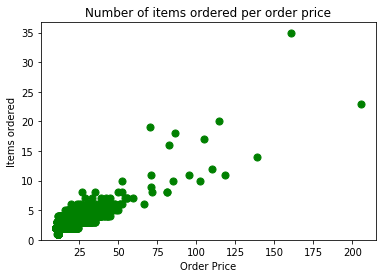